In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings


In [2]:
warnings.filterwarnings('ignore')

In [3]:
option_df=pd.read_csv('options_KR.csv')
option_df

,Date,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week
0,2009-06-02,33.45,180.90,4377777,4.940000e+11,-4953,-24646,6581,1228,-466,31336,0.94,7,Tue
1,2009-06-03,32.66,180.47,4562690,-8.997074e+10,47,-57128,46851,399,127709,-22259,0.93,6,Wed
2,2009-06-04,32.56,180.31,4827524,-1.090000e+11,-7666,-2000,48883,5744,262558,10367,0.87,5,Thu
3,2009-06-05,32.95,175.75,5022921,9.842024e+10,969,64792,27196,-1688,79789,113935,0.89,4,Fri
4,2009-06-08,30.41,177.77,5293996,4.329179e+10,5797,10995,23123,-5534,97154,146244,0.81,3,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2019-11-01,13.22,275.82,2942228,1.390000e+11,4586,-4075,944,-3003,8304,5085,1.04,4,Fri
2576,2019-11-04,13.32,278.43,2984183,7.023820e+10,5676,1249,-6222,-1357,-11617,-7563,0.87,3,Mon
2577,2019-11-05,13.42,282.54,3024099,3.250000e+11,-2167,-1932,16951,1341,12141,-5222,0.99,2,Tue
2578,2019-11-06,13.89,284.38,3081381,2.380000e+11,316,14251,8795,957,-15649,-5103,0.69,1,Wed


<AxesSubplot: >

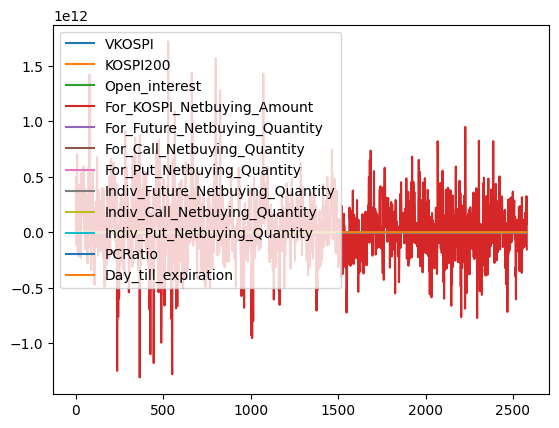

In [4]:
option_df.plot()

<AxesSubplot: ylabel='Open_interest'>

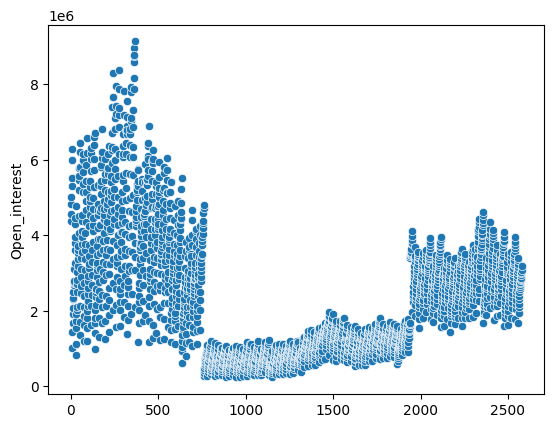

In [5]:
sns.scatterplot(option_df['Open_interest'])

<AxesSubplot: ylabel='For_Call_Netbuying_Quantity'>

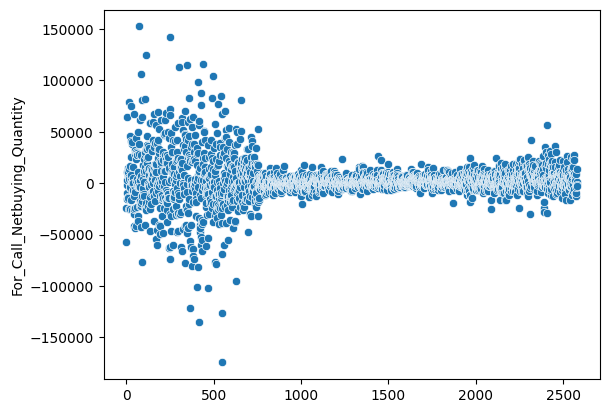

In [6]:
sns.scatterplot(option_df['For_Call_Netbuying_Quantity'])

<AxesSubplot: ylabel='Indiv_Future_Netbuying_Quantity'>

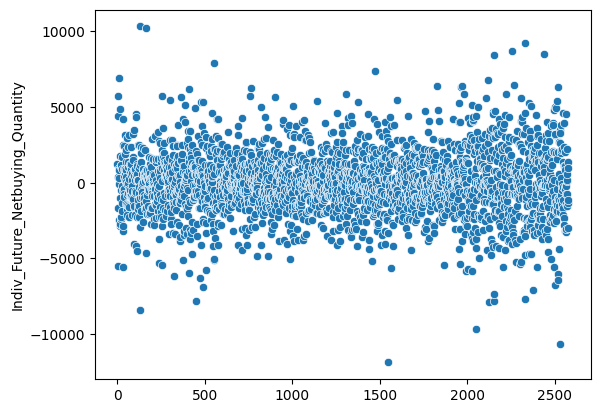

In [7]:
sns.scatterplot(option_df['Indiv_Future_Netbuying_Quantity'])

In [8]:
option_df.keys()

Index(['Date', 'VKOSPI', 'KOSPI200', 'Open_interest',
       'For_KOSPI_Netbuying_Amount', 'For_Future_Netbuying_Quantity',
       'For_Call_Netbuying_Quantity', 'For_Put_Netbuying_Quantity',
       'Indiv_Future_Netbuying_Quantity', 'Indiv_Call_Netbuying_Quantity',
       'Indiv_Put_Netbuying_Quantity', 'PCRatio', 'Day_till_expiration',
       'Day_of_a_week'],
      dtype='object')

In [9]:
option_df.shape      #gives the shape of dataframe 

(2580, 14)

In [10]:
option_df.shape[0]   #it will give u rows

2580

In [11]:
option_df.shape[1]    #it ill give u colums

14

In [13]:
option_df.head()

,Date,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week
0,2009-06-02,33.45,180.90,4377777,4.940000e+11,-4953,-24646,6581,1228,-466,31336,0.94,7,Tue
1,2009-06-03,32.66,180.47,4562690,-8.997074e+10,47,-57128,46851,399,127709,-22259,0.93,6,Wed
2,2009-06-04,32.56,180.31,4827524,-1.090000e+11,-7666,-2000,48883,5744,262558,10367,0.87,5,Thu
3,2009-06-05,32.95,175.75,5022921,9.842024e+10,969,64792,27196,-1688,79789,113935,0.89,4,Fri
4,2009-06-08,30.41,177.77,5293996,4.329179e+10,5797,10995,23123,-5534,97154,146244,0.81,3,Mon


In [14]:
option_df.tail()

,Date,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week
2575,2019-11-01,13.22,275.82,2942228,1.390000e+11,4586,-4075,944,-3003,8304,5085,1.04,4,Fri
2576,2019-11-04,13.32,278.43,2984183,7.023820e+10,5676,1249,-6222,-1357,-11617,-7563,0.87,3,Mon
2577,2019-11-05,13.42,282.54,3024099,3.250000e+11,-2167,-1932,16951,1341,12141,-5222,0.99,2,Tue
2578,2019-11-06,13.89,284.38,3081381,2.380000e+11,316,14251,8795,957,-15649,-5103,0.69,1,Wed
2579,2019-11-07,13.78,284.52,3175919,-1.550000e+11,2291,-2953,26965,-1137,25430,-14659,0.87,0,Thu


In [15]:
option_df.columns        #give the column name

Index(['Date', 'VKOSPI', 'KOSPI200', 'Open_interest',
       'For_KOSPI_Netbuying_Amount', 'For_Future_Netbuying_Quantity',
       'For_Call_Netbuying_Quantity', 'For_Put_Netbuying_Quantity',
       'Indiv_Future_Netbuying_Quantity', 'Indiv_Call_Netbuying_Quantity',
       'Indiv_Put_Netbuying_Quantity', 'PCRatio', 'Day_till_expiration',
       'Day_of_a_week'],
      dtype='object')

In [ ]:
option_df.info()      #it will give the information about  non-null values and count of each and the datatype used

In [ ]:
#checking the null values in data
option_df.isna().sum()

In [ ]:
option_df.describe()  #the descibe will give u the mean,meadian,mode,standard deviation, min , max , and percentile values

In [ ]:
option_df['PCRatio'].nunique()

In [ ]:
option_df['PCRatio'].unique()

In [ ]:
option_df['PCRatio'].value_counts()

# Lets see Plotting of the data

## importing seaborn for kdeplot

In [ ]:
option_df['PCRatio'].plot()

In [ ]:
sns.kdeplot(option_df['PCRatio'])   #this is normal distribution bell curve

In [ ]:
sns.distplot(option_df['PCRatio'])

In [ ]:
sns.kdeplot(option_df['Indiv_Put_Netbuying_Quantity'])  #this is also known as positively distributed

In [ ]:
sns.kdeplot(option_df['For_KOSPI_Netbuying_Amount']) 

## importing seaborn for count plot

In [ ]:
sns.countplot(option_df['PCRatio'])

## Feature engineering

In [ ]:
#linearity
option_df.cov()

In [ ]:
option_df.mean()

In [ ]:
option_df.mode()

In [ ]:
option_df.median()

In [ ]:
option_df.std()

In [ ]:
option_df.var()

In [ ]:
option_df.corr()

## heatmap

In [ ]:
sns.heatmap(option_df.corr())

In [ ]:
plt.figure(figsize=(10,1))
sns.heatmap(option_df.corr().head(1), annot=True)


In [ ]:
sns.pairplot(option_df)


In [ ]:
sns.histplot(option_df['PCRatio'],kde=True)

In [ ]:
sns.histplot(option_df['PCRatio'])

In [ ]:
sns.scatterplot((option_df['PCRatio'],option_df['Open_interest']))

In [ ]:
sns.heatmap(option_df.corr(), annot=True, cmap='YlGnBu')

In [ ]:
>> Errors:
    Residual Errors (SSE/RSS) = actual -pred >> Unexplained Errors
    Regression Errors (SSR) = pred - mean    >> Explained Errors
    Total Errors (SST) = Residual + Regression
                          actual - mean
        
>> Coeffiecient of Determination (r2_score):
    >> To check the Model/to check the reliability of the model
    >> Evaluate the performance of the model/ it will define how the model is
    >> Lesser the unexplained variance/resiual , Better the model
    >> It is used to check the goodness of BFL
    >> if we have 1 ind var:
        >> Coeffiecient of Determination
        >> R * R
    >> if we have more than 1 ind var:
        >> Coeffiecient of Multiple Determination
        
    >> r2_score ranges from 0 to 1
    
    *** r2_score = 1 - SSE/SST
    
    >> When SSE = 0:
        r2_score == 1
        
    >> When SST > SSE:
        r2_score >> 0 to 1
        
    >> When SSE > SST:
        r2_score == -ve
    
    >> r2_score is not considered as very good metric to evaluate the model:
        Becuase it gets impacted by bad predictors
        
>> So we make use of Adjusted_r2_score:
    >> Modified version of r2_score
    >> It will only increase when we add good predictors
    >> Adjusted_r2_score will always be less than r2_score

In [ ]:
option_df.plot(x='PCRatio',y='Open_interest',kind='scatter')

In [ ]:
sns.pairplot(option_df, hue='PCRatio')